In [59]:
# Required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Loading movies data using pandas

movies = pd.read_csv("./ml-20m/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Loading ratings data using pandas

ratings = pd.read_csv("./ml-20m/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
# Analyzing movies data

print('Size of movies data:',movies.shape,'\n')
print('Total number of movies:',len(movies["movieId"].unique()),'\n')
print('Columns in movies data:',movies.columns,'\n')
print('Checking whether there are any NULL entries:\n',movies.isnull().sum(),'\n')
print('Genres in movies data:\n',movies["genres"].unique(),'\n')
print('Total available genres:',len(movies["genres"].unique()))

Size of movies data: (27278, 3) 

Total number of movies: 27278 

Columns in movies data: Index(['movieId', 'title', 'genres'], dtype='object') 

Checking whether there are any NULL entries:
 movieId    0
title      0
genres     0
dtype: int64 

Genres in movies data:
 ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Action|Adventure|Animation|Fantasy|Horror'
 'Animation|Children|Comedy|Fantasy|Sci-Fi'
 'Animation|Children|Comedy|Western'] 

Total available genres: 1342


In [5]:
# Analyzing ratings data

print('Size of ratings data:',ratings.shape,'\n')
print('Total number of ratings:',len(ratings["rating"]),'\n')
print('Columns in ratings data:',ratings.columns,'\n')
print('Checking whether there are any NULL entries:\n',ratings.isnull().sum(),'\n')
good_ratings = ratings[ratings["rating"] >= 3.5]["rating"].count()
print("There are" , good_ratings , "good ratings given by users\n")
moderate_ratings = ratings[ratings["rating"] <= 3]["rating"].count()
print("There are" , moderate_ratings , "moderate ratings\n")
worse_ratings=0
for rating in ratings['rating']:
    if rating == 0.5: worse_ratings=worse_ratings+1
print("There are" , worse_ratings , "worse ratings")

Size of ratings data: (20000263, 4) 

Total number of ratings: 20000263 

Columns in ratings data: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object') 

Checking whether there are any NULL entries:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

There are 12195566 good ratings given by users

There are 7804697 moderate ratings

There are 239125 worse ratings


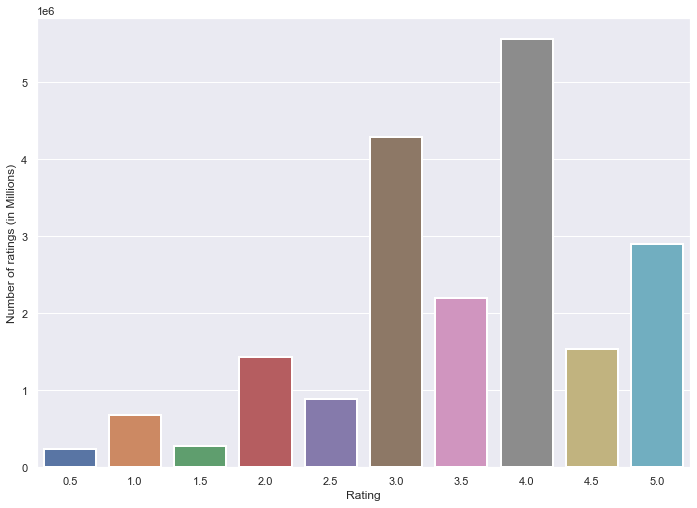

In [58]:
# Plotting the ratings

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.countplot(data = ratings , x = "rating", linewidth=2)
sns_plot.set( xlabel='Rating', ylabel='Number of ratings (in Millions)')
#fig = sns_plot.get_figure()
#fig.savefig("output.png")

In [7]:
# what we need is that movie id and title

movie = movies.loc[:,["movieId","title"]]
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [8]:
# what we need is that user id, movie id and rating

rating = ratings.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [9]:
# then merge movie and rating data

data = pd.merge(movie,rating)

# Taking the first 1 Million entries

data = data.iloc[:1000000,:]

# now lets look at our data 

data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [73]:
print("Shape of new data:",data.shape)

Shape of new data: (1000000, 4)


In [74]:
# Transforming the words into numerical data

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])
tfidf_matrix

<1000000x623 sparse matrix of type '<class 'numpy.float64'>'
	with 4930190 stored elements in Compressed Sparse Row format>

In [12]:
# Finding the similarity using cosine similarity
#cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Creating the pivot table
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head()

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Randomly selecting a movie from the data

movie_watched = pivot_table.iloc[:,random.randint(0, pivot_table.shape[1])]

#Finding the similarity with other movies

similarity_with_other_movies = pivot_table.corrwith(movie_watched)
similarity_with_other_movies.sort_values(ascending=False).head()

title
City Hall (1996)           1.000000
Shadows (Cienie) (1988)    0.728396
Shopping (1994)            0.476545
Two Bits (1995)            0.471939
Guardian Angel (1994)      0.434500
dtype: float64

In [72]:
movie_watched = pivot_table["Vampire in Brooklyn (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Ace Ventura: When Nature Calls (1995) " and other movies
similarity_with_other_movies.sort_values(ascending=False).head()

title
Vampire in Brooklyn (1995)                                        1.000000
Headless Body in Topless Bar (1995)                               0.889297
Gospa (1995)                                                      0.866025
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.745499
Race the Sun (1996)                                               0.697001
dtype: float64